In [3]:
%pylab inline
import pandas as pd
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [4]:
annotation = pd.read_csv('../zv9_gene_annotation.txt', index_col=0)

sample_info = pd.read_csv('sample_info.csv', index_col=0)

tpm = pd.read_csv('followup_tpm.csv', index_col=0)
ercc_idx = filter(lambda s: 'ERCC-' in s, tpm.index)

etpm = tpm.drop(ercc_idx)
etpm = etpm.drop('GFP')

etpm = etpm / etpm.sum() * 1e6

In [6]:
# Original data
original_sample_data = pd.read_csv('../sample_info_qc_pt.csv', index_col=0).sort_index(0).sort_index(1)
original_sample_data = original_sample_data.ix[original_sample_data["Pass QC"]]
original_sample_data = original_sample_data.query('cluster != "x"')

from ast import literal_eval
original_sample_data['cluster_color'] = original_sample_data['cluster_color'].apply(literal_eval)

In [7]:
import statsmodels.formula.api as smf 

In [8]:
sample_info = sample_info.query('pass_qc')

In [10]:
sample_info.Population.value_counts()

high    110
P5       92
low      67
dtype: int64

In [11]:
sample_info.groupby('plate').first()

,488,561,ERCC_content,Events,FSC,GFP,MT_content,Population,SSC,Sample/Name,...,index_file_ending,keep,mapping_rate,n,num_genes,num_high_genes,pass_qc,reads,row,samplesheet
plate,,,,,,,,,,,,,,,,,,,,,
1,2216,1,961019.75564,1,18871,1119.520,45248.614564,high,80,CD41_P1_B1,...,plate1.csv,True,35.75350,192,400,327,True,841760,B,AC_SLX8833_SampleSheet_v24_190515_Plate_1_Kidn...
2,16,1,390530.68330,1,25019,0.000,84407.529558,P5,89,CD41_P2_B1,...,plate2.csv,True,1.85299,0,451,375,True,530387,B,AC_SLX8830_SampleSheet_v24_190515_Plate_2_Kidn...
3,52,2,844447.17540,1,22725,338.524,73702.707233,low,60,CD41_P3_B1,...,dim.csv,True,28.46960,96,1229,784,True,1852674,B,AC_SLX8831_SampleSheet_v24_190515_Plate_3_Hear...


In [12]:
sample_info['location'] = sample_info.plate.map(lambda p: 'Circulation' if p == 3 else 'Kidney')

In [13]:
sample_info['Population'].map({'P5': 'EarlyEnriched', 'low': 'EGFP-low', 'high': 'EGFP-high'})

SLX8830-N701-N502    EarlyEnriched
SLX8830-N701-N503    EarlyEnriched
SLX8830-N701-N504    EarlyEnriched
SLX8830-N701-N505    EarlyEnriched
SLX8830-N701-N506    EarlyEnriched
SLX8830-N701-N507    EarlyEnriched
SLX8830-N701-N508    EarlyEnriched
SLX8830-N701-N517    EarlyEnriched
SLX8830-N702-N502    EarlyEnriched
SLX8830-N702-N503    EarlyEnriched
SLX8830-N702-N504    EarlyEnriched
SLX8830-N702-N505    EarlyEnriched
SLX8830-N702-N506    EarlyEnriched
SLX8830-N702-N507    EarlyEnriched
SLX8830-N702-N508    EarlyEnriched
SLX8830-N702-N517    EarlyEnriched
SLX8830-N703-N502    EarlyEnriched
SLX8830-N703-N503    EarlyEnriched
SLX8830-N703-N504    EarlyEnriched
SLX8830-N703-N505    EarlyEnriched
SLX8830-N703-N506    EarlyEnriched
SLX8830-N703-N507    EarlyEnriched
SLX8830-N703-N508    EarlyEnriched
SLX8830-N703-N517    EarlyEnriched
SLX8830-N704-N502    EarlyEnriched
SLX8830-N704-N503    EarlyEnriched
SLX8830-N704-N506    EarlyEnriched
SLX8830-N704-N507    EarlyEnriched
SLX8830-N704-N508   

In [14]:
sample_info['condition'] = sample_info['location'] + ' ' + sample_info['Population']

In [15]:
sample_info['condition'] = sample_info['location'] + '\n' + sample_info['Population'].map({'P5': 'EarlyEnriched', 'low': 'EGFP-low', 'high': 'EGFP-high'})

In [95]:
sample_info['condition'].value_counts()

Kidney\nEarlyEnriched     92
Circulation\nEGFP-high    67
Kidney\nEGFP-high         43
Kidney\nEGFP-low          43
Circulation\nEGFP-low     24
dtype: int64

In [16]:
ordering = sample_info.condition.sort(inplace=False).unique()[[4, 3, 2, 1, 0]]

In [17]:
sns.set_style('whitegrid');

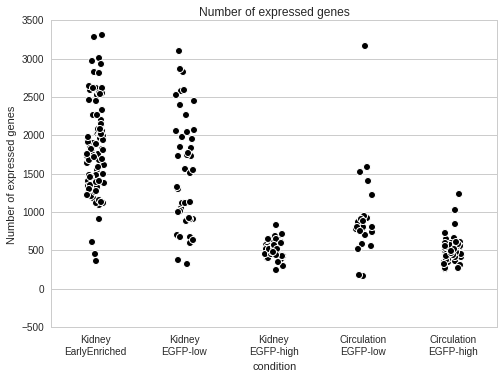

In [96]:
sns.stripplot(x='condition',
              y='num_genes',
              data=sample_info,
              jitter=True,
              order=ordering,
              color='k');

plt.ylabel('Number of expressed genes');
plt.title('Number of expressed genes');
plt.savefig('../cell-reports-rebuttal/followup_expressed_genes.pdf');

In [97]:
ccol = original_sample_data.groupby('cluster')['cluster_color'].first()

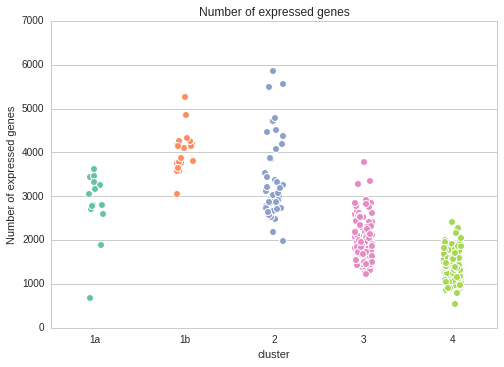

In [98]:
sns.stripplot(x='cluster',
              y='detected_genes',
              data=original_sample_data,
              jitter=True,
              order=['1a', '1b', '2', '3', '4'],
              palette=ccol);

plt.ylabel('Number of expressed genes');
plt.title('Number of expressed genes');

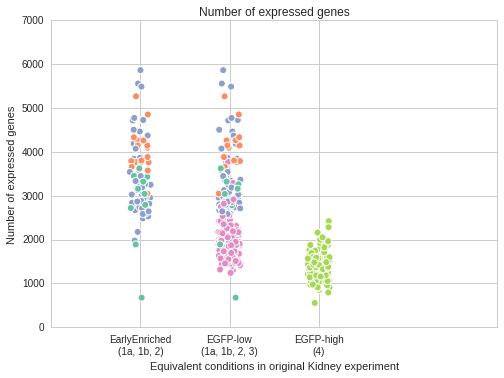

In [99]:
jitter_width = 0.25

column = 'detected_genes'
y = original_sample_data.query('cluster in ["1a", "1b", "2"]')[column]
plt.scatter(np.random.rand(y.shape[0]) * jitter_width - jitter_width / 2 + 1, y,
            color=original_sample_data.ix[y.index, 'cluster_color'],
            s=50,
            edgecolor='w',
            lw=1);

y = original_sample_data.query('cluster in ["1a", "1b", "2", "3"]')[column]
plt.scatter(np.random.rand(y.shape[0]) * jitter_width - jitter_width / 2 + 2, y,
            color=original_sample_data.ix[y.index, 'cluster_color'],
            s=50,
            edgecolor='w',
            lw=1);

y = original_sample_data.query('cluster in ["4"]')[column]
plt.scatter(np.random.rand(y.shape[0]) * jitter_width - jitter_width / 2 + 3, y,
            color=original_sample_data.ix[y.index, 'cluster_color'],
            s=50,
            edgecolor='w',
            lw=1);

plt.xlim(0, 5);

plt.xticks([1, 2, 3], ['EarlyEnriched\n(1a, 1b, 2)', 'EGFP-low\n(1a, 1b, 2, 3)', 'EGFP-high\n(4)']);
plt.title('Number of expressed genes');
sns.axlabel('Equivalent conditions in original Kidney experiment', 'Number of expressed genes');
plt.savefig('../cell-reports-rebuttal/followup_expressed_genes-original.pdf');

In [41]:
sample_info['mRNA_content'] = 1e6 - sample_info['ERCC_content']

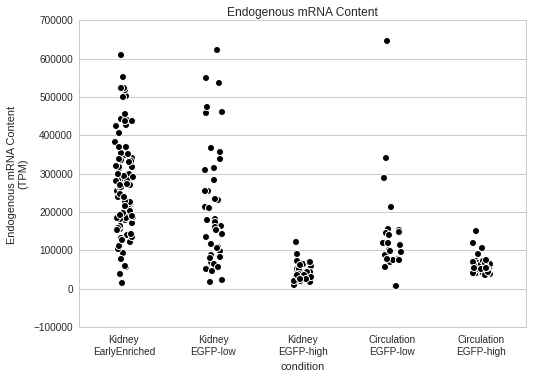

In [100]:
sns.stripplot(x='condition',
              y='mRNA_content',
              data=sample_info,
              jitter=True,
              order=ordering,
              color='k');

plt.ylabel('Endogenous mRNA Content\n(TPM)');
plt.title('Endogenous mRNA Content');
plt.savefig('../cell-reports-rebuttal/followup_rna_content.pdf');

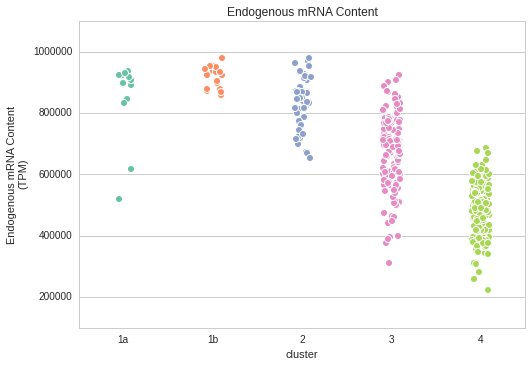

In [101]:
sns.stripplot(x='cluster',
              y='mRNA_content',
              data=original_sample_data,
              jitter=True,
              order=['1a', '1b', '2', '3', '4'],
              palette=ccol);

plt.ylabel('Endogenous mRNA Content\n(TPM)');
plt.title('Endogenous mRNA Content');

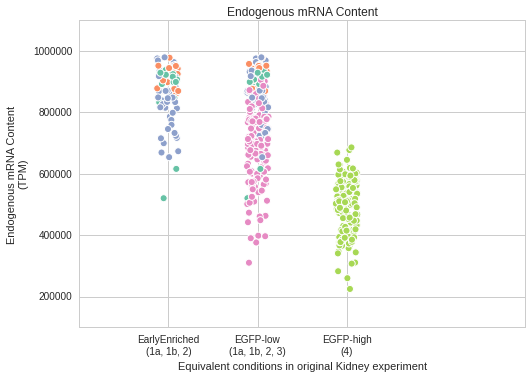

In [102]:
jitter_width = 0.25

column = 'mRNA_content'
y = original_sample_data.query('cluster in ["1a", "1b", "2"]')[column]
plt.scatter(np.random.rand(y.shape[0]) * jitter_width - jitter_width / 2 + 1, y,
            color=original_sample_data.ix[y.index, 'cluster_color'],
            s=50,
            edgecolor='w',
            lw=1);

y = original_sample_data.query('cluster in ["1a", "1b", "2", "3"]')[column]
plt.scatter(np.random.rand(y.shape[0]) * jitter_width - jitter_width / 2 + 2, y,
            color=original_sample_data.ix[y.index, 'cluster_color'],
            s=50,
            edgecolor='w',
            lw=1);

y = original_sample_data.query('cluster in ["4"]')[column]
plt.scatter(np.random.rand(y.shape[0]) * jitter_width - jitter_width / 2 + 3, y,
            color=original_sample_data.ix[y.index, 'cluster_color'],
            s=50,
            edgecolor='w',
            lw=1);

plt.xlim(0, 5);

plt.xticks([1, 2, 3], ['EarlyEnriched\n(1a, 1b, 2)', 'EGFP-low\n(1a, 1b, 2, 3)', 'EGFP-high\n(4)']);
sns.axlabel('Equivalent conditions in original Kidney experiment', 'Endogenous mRNA Content\n(TPM)');
plt.title('Endogenous mRNA Content');
plt.savefig('../cell-reports-rebuttal/followup_rna_content-original.pdf');

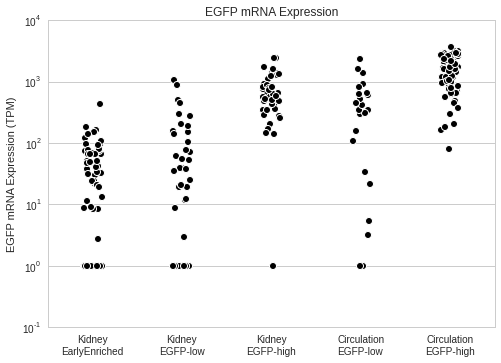

In [46]:
tmp = sample_info.copy()
tmp.GFP += 1
sns.stripplot(x='condition',
              y='GFP',
              data=tmp,
              jitter=True,
              order=ordering,
              color='k');

sns.axlabel('', 'EGFP mRNA Expression (TPM)');
plt.title('EGFP mRNA Expression');

plt.yscale('log');
plt.savefig('../figures/followup_egfp_expr.pdf');

In [82]:
full_res = smf.ols('np.log10(GFP) ~ 1 + C(location)', data=tmp.query('Population == "high"')).fit()
res_res = smf.ols('np.log10(GFP) ~ 1', data=tmp.query('Population == "high"')).fit()
full_res.compare_lr_test(res_res)

(13.736202989506779, 0.00021036031055986655, 1.0)

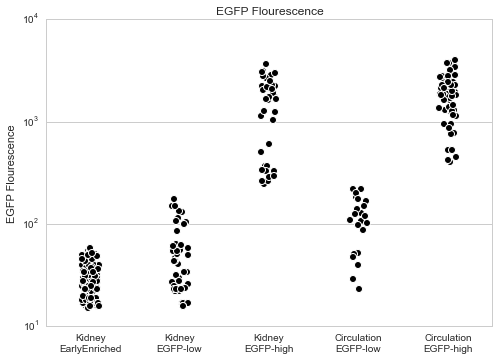

In [89]:
sns.stripplot(x='condition',
              y='488',
              data=sample_info,
              jitter=True,
              order=ordering,
              color='k');

sns.axlabel('', 'EGFP Flourescence');
plt.title('EGFP Flourescence');

plt.yscale('log');

In [104]:
sample_info['log_488'] = np.log10(sample_info['488'])

In [105]:
full_res = smf.ols('log_488 ~ 1 + C(location)', data=sample_info.query('Population == "high"')).fit()
res_res = smf.ols('log_488 ~ 1', data=sample_info.query('Population == "high"')).fit()
full_res.compare_lr_test(res_res)

(7.4178275639885101, 0.0064580742993668276, 1.0)

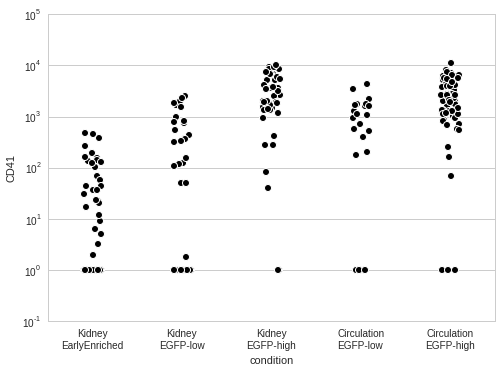

In [106]:
sample_info['CD41'] = etpm.ix['ENSDARG00000018687'] + 1
sns.stripplot(x='condition',
              y='CD41',
              data=sample_info,
              jitter=True,
              order=ordering,
              color='k');
plt.yscale('log');
plt.savefig('../cell-reports-rebuttal/followup_cd41_expression.pdf');

In [47]:
original_genes = pd.read_csv('../gene_expression_s.csv', index_col=0).sort_index(0).sort_index(1)
original_egenes = original_genes.drop(ercc_idx)
original_egenes = original_egenes.drop('GFP')
original_egenes = (original_egenes / original_egenes.sum()) * 1e6

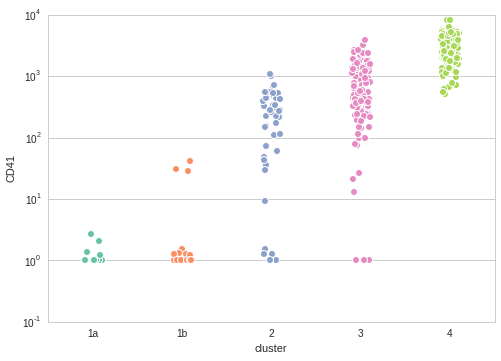

In [83]:
original_sample_data['CD41'] = original_egenes.ix['ENSDARG00000018687'] + 1
sns.stripplot(x='cluster',
              y='CD41',
              data=original_sample_data,
              jitter=True,
              order=['1a', '1b', '2', '3', '4'],
              palette=ccol);

plt.yscale('log')

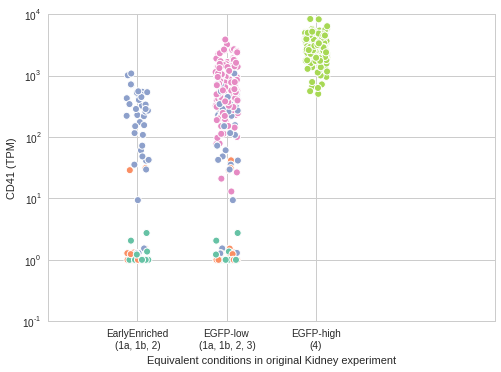

In [107]:
jitter_width = 0.25

column = 'CD41'
y = original_sample_data.query('cluster in ["1a", "1b", "2"]')[column]
plt.scatter(np.random.rand(y.shape[0]) * jitter_width - jitter_width / 2 + 1, y,
            color=original_sample_data.ix[y.index, 'cluster_color'],
            s=50,
            edgecolor='w',
            lw=1);

y = original_sample_data.query('cluster in ["1a", "1b", "2", "3"]')[column]
plt.scatter(np.random.rand(y.shape[0]) * jitter_width - jitter_width / 2 + 2, y,
            color=original_sample_data.ix[y.index, 'cluster_color'],
            s=50,
            edgecolor='w',
            lw=1);

y = original_sample_data.query('cluster in ["4"]')[column]
plt.scatter(np.random.rand(y.shape[0]) * jitter_width - jitter_width / 2 + 3, y,
            color=original_sample_data.ix[y.index, 'cluster_color'],
            s=50,
            edgecolor='w',
            lw=1);

plt.yscale('log');

plt.xlim(0, 5);

plt.xticks([1, 2, 3], ['EarlyEnriched\n(1a, 1b, 2)', 'EGFP-low\n(1a, 1b, 2, 3)', 'EGFP-high\n(4)']);
sns.axlabel('Equivalent conditions in original Kidney experiment', 'CD41 (TPM)');
plt.savefig('../cell-reports-rebuttal/followup_cd41_expression-original.pdf');

In [108]:
full_res = smf.ols('CD41 ~ 1 + C(location)', data=sample_info.query('Population == "high"')).fit()
res_res = smf.ols('CD41 ~ 1', data=sample_info.query('Population == "high"')).fit()
full_res.compare_lr_test(res_res)

(0.22344563852357169, 0.63642696354544293, 1.0)

In [111]:
sample_info.Population.value_counts()

high    110
P5       92
low      67
dtype: int64

In [116]:
full_res = smf.ols('CD41 ~ 1 + C(Population)', data=sample_info.query('Population in ["high", "low"] & location == "Kidney"')).fit()
res_res = smf.ols('CD41 ~ 1', data=sample_info.query('Population in ["high", "low"] & location == "Kidney"')).fit()
full_res.compare_lr_test(res_res)

(35.031668881844553, 3.243864060915274e-09, 1.0)

In [117]:
full_res = smf.ols('CD41 ~ 1 + C(Population)', data=sample_info.query('Population in ["P5", "low"] & location == "Kidney"')).fit()
res_res = smf.ols('CD41 ~ 1', data=sample_info.query('Population in ["P5", "low"] & location == "Kidney"')).fit()
full_res.compare_lr_test(res_res)

(25.624544881807424, 4.1473036233594015e-07, 1.0)

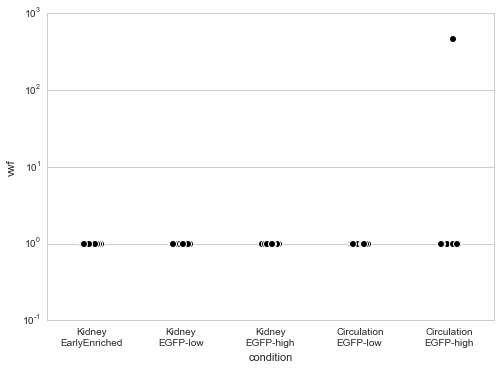

In [92]:
sample_info['vwf'] = etpm.ix['ENSDARG00000077231'] + 1
sns.stripplot(x='condition',
              y='vwf',
              data=sample_info,
              jitter=True,
              order=ordering,
              color='k');
plt.yscale('log');

In [121]:
exp_etpm = etpm[((etpm > 1).sum(1) > 2)]

In [122]:
kidney_idx = sample_info.query('Population == "high" & location == "Kidney"').index
circulation_idx = sample_info.query('Population == "high" & location == "Circulation"').index

In [123]:
from scipy import stats

In [124]:
annotation = pd.read_csv('../zv9_gene_annotation.txt', index_col=0, sep='\t')

In [125]:
# Perform LR test for every gene

In [126]:
tmp = sample_info.query('Population == "high"').copy()

In [127]:
test_results = pd.Series(index=exp_etpm.index)
for gene in exp_etpm.index:
    tmp['tmp_gene'] = np.log10(etpm.ix[gene, tmp.index] + 1)
    full_res = smf.ols('tmp_gene ~ 1 + C(location)', data=tmp).fit()
    res_res = smf.ols('tmp_gene ~ 1', data=tmp).fit()
    test_results[gene] = full_res.compare_lr_test(res_res)[1]

In [128]:
test_results.dropna().shape

(8507,)

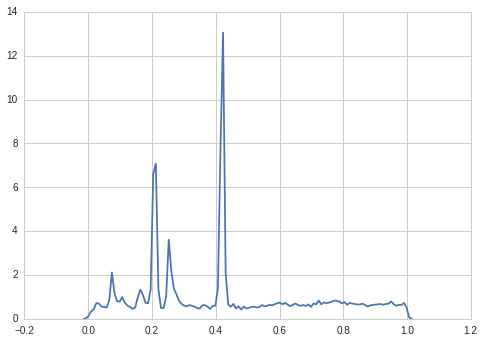

In [129]:
sns.kdeplot(test_results, bw=0.005);

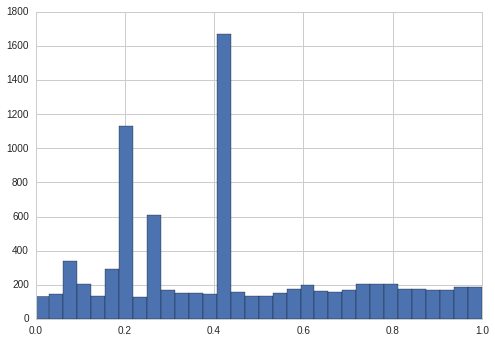

In [134]:
test_results.hist(bins=32);

In [135]:
test_results.mode()

0    0.208217
dtype: float64

In [136]:
test_results[np.isclose(test_results, 0.4347)].head()

Series([], dtype: float64)

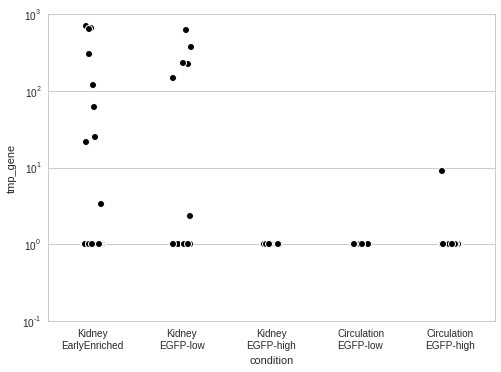

In [137]:
sample_info['tmp_gene'] = etpm.ix['ENSDARG00000043137'] + 1
sns.stripplot(x='condition',
              y='tmp_gene',
              data=sample_info,
              jitter=True,
              order=ordering,
              color='k');
plt.yscale('log');

The large peak in the p-value histogram is explained by a gene being expressed in only one cell.

Most likely the second peak is two cells in one condition expressing it, and the third biggest peak between them correspond to one cell in each condition expressing, etc. Our kind of data seem to have these spurious one-cell gene expressions. Most likely due to some sort of noise.

In [138]:
# How many genes _can_ we assess?

idx = sample_info.query('Population == "high"').index
((etpm[idx] > 1).sum(1) > 2).sum()

4502

In [139]:
test_results[(test_results < 0.005)].sort(inplace=False)

0
ENSDARG00000076128    0.000065
ENSDARG00000015887    0.000800
ENSDARG00000088436    0.000977
ENSDARG00000017163    0.001534
ENSDARG00000004261    0.001567
ENSDARG00000019253    0.001654
ENSDARG00000053129    0.001668
ENSDARG00000016531    0.003004
ENSDARG00000043394    0.003374
ENSDARG00000091744    0.003692
ENSDARG00000008057    0.003936
ENSDARG00000055938    0.004063
ENSDARG00000030537    0.004688
ENSDARG00000068214    0.004959
dtype: float64

In [140]:
annotation.ix[test_results[(test_results < 0.005)].sort(inplace=False).index]

,Associated Gene Name,Chromosome Name,Gene Start (bp),Gene End (bp),Gene Biotype,Transcript count
0,,,,,,
ENSDARG00000076128,prkar1aa,3,36261711,36271831,protein_coding,2
ENSDARG00000015887,b2ml,8,53210637,53219002,protein_coding,3
ENSDARG00000088436,CT956064.3,20,55774138,55775909,protein_coding,1
ENSDARG00000017163,sinup,4,19111833,19113558,protein_coding,2
ENSDARG00000004261,tmed9,14,27413738,27421016,protein_coding,2
ENSDARG00000019253,rhag,20,13929587,13968857,protein_coding,4
ENSDARG00000053129,carhsp1,3,27949213,27982934,protein_coding,2
ENSDARG00000016531,klhl4,14,27806002,27852531,protein_coding,4
ENSDARG00000043394,si:dkey-71h2.2,20,19349092,19438035,protein_coding,1


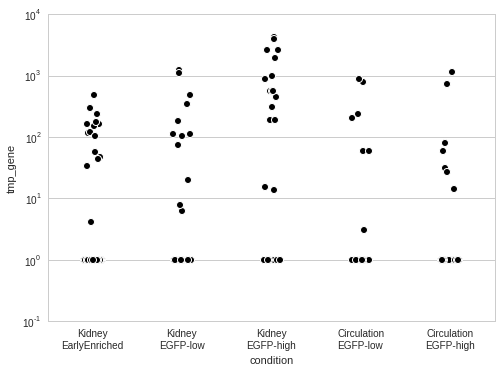

In [141]:
sample_info['tmp_gene'] = etpm.ix['ENSDARG00000076128'] + 1
sns.stripplot(x='condition',
              y='tmp_gene',
              data=sample_info,
              jitter=True,
              order=ordering,
              color='k');
plt.yscale('log');

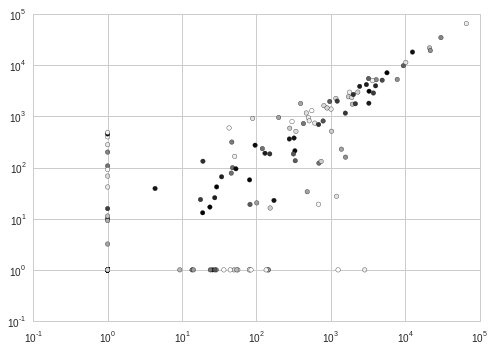

In [142]:
plt.scatter(exp_etpm[kidney_idx].median(1) + 1, exp_etpm[circulation_idx].median(1) + 1,c=test_results.replace(np.nan, 1));
plt.loglog();

In [143]:
from statsmodels.sandbox.stats.multicomp import multipletests 

In [144]:
apval = multipletests(test_results)[1]

In [145]:
apval = pd.Series(apval, index=test_results.index)

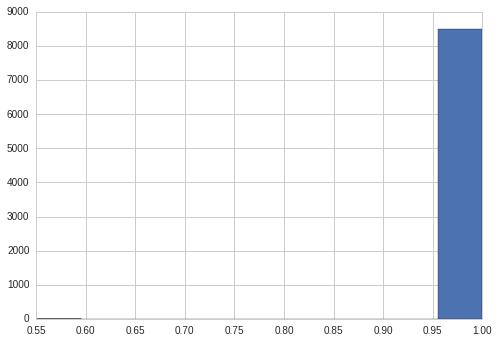

In [146]:
apval.hist();

In [147]:
apval.value_counts()

1.000000    8499
1.000000       1
0.551086       1
1.000000       1
1.000000       1
0.999950       1
1.000000       1
1.000000       1
0.999994       1
dtype: int64

In [151]:
apval.dropna().sort(inplace=False).head()

0
ENSDARG00000076128    0.551086
ENSDARG00000015887    0.999950
ENSDARG00000088436    0.999994
ENSDARG00000017163    1.000000
ENSDARG00000004261    1.000000
dtype: float64

In [152]:
annotation.ix['ENSDARG00000076128']

Associated Gene Name          prkar1aa
Chromosome Name                      3
Gene Start (bp)               36261711
Gene End (bp)                 36271831
Gene Biotype            protein_coding
Transcript count                     2
Name: ENSDARG00000076128, dtype: object